<a href="https://www.aus.edu/"><img src="https://i.imgur.com/pdZvnSD.png" width=200> </a>

<h1 align=center><font size = 5>Data Exploration, Cleaning, and Preparation - Titanic Case Study</font>
<h1 align=center><font size = 5>Prepared by Alex Aklson, Ph.D.</font>
<h1 align=center><font size = 5>September 19, 2024</font>

## Import Libraries <a id="import-libraries"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, Binarizer, OneHotEncoder, OrdinalEncoder
from scipy.stats import pearsonr, spearmanr, chi2_contingency, pointbiserialr, f_oneway

from sklearn.impute import SimpleImputer

pd.set_option("display.max_columns", None) # to display all columns in a dataframe

Load Titanic dataset

In [2]:
titanic = sns.load_dataset('titanic')

View the first five objects / instances /samples

In [3]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Get the number of objects and attributes

In [4]:
titanic.shape

(891, 15)

## Data Exploration <a id="data-exploration"></a>

Identifying Data Types (categorical, nominal, ordinal, numerical)

In [5]:
print("Data Types in Titanic Dataset:\n", titanic.dtypes)

Data Types in Titanic Dataset:
 survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object


In [6]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Check for missing values in the dataset

In [8]:
missing_data = titanic.isnull().sum()

print("Missing Data in the Titanic Dataset:\n", missing_data)

Missing Data in the Titanic Dataset:
 survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


We see that we have 177 missing values in **age**, 688 missing values in **deck**, and 2 missing values in **embarked** and **embark_town**.

Let's start visualizing the dataset

### 1. Visualizing Attributes - Numerical Attributes

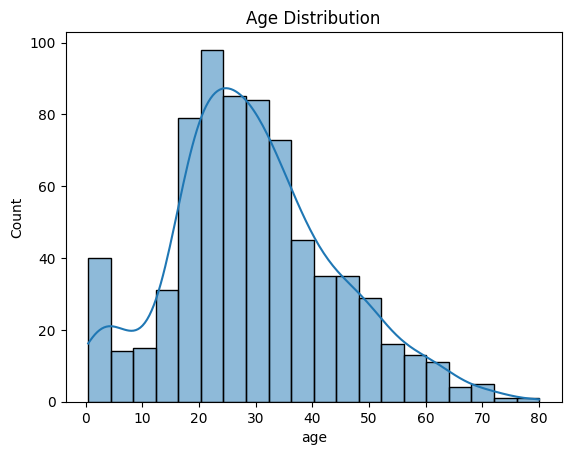

In [9]:
sns.histplot(titanic['age'], kde=True)
plt.title("Age Distribution")
plt.show()

We observe a slight skewness to the right. We confirm this by noting a difference between the mean and the median values.

In [10]:
print(titanic['age'].mean(), titanic['age'].median())

29.69911764705882 28.0


Howeve, the difference is *NOT* that significant.

Let's visualize the distribution for the fare attribute.

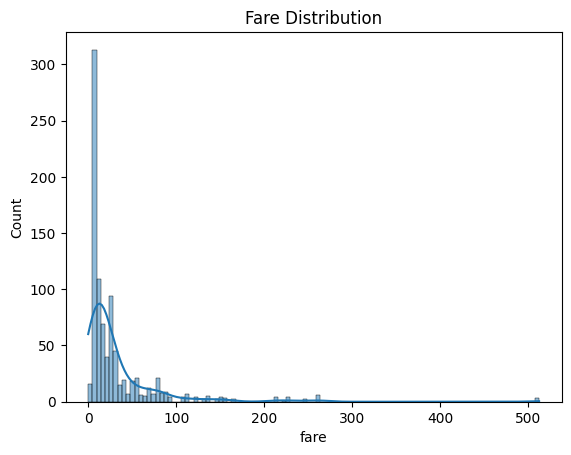

In [11]:
sns.histplot(titanic['fare'], kde=True)
plt.title("Fare Distribution")
plt.show()

Wow! This is a distribution with a strong skewness to the right.

In [12]:
print(titanic['fare'].mean(), titanic['fare'].median())

32.204207968574636 14.4542


And the difference between the mean and median is significant. The mean is more than twice as much as the median. So we will most likely need to transform the fare attribute into a normal distribution before we feed it into a machine learning algorithm.

Let's proceed with the rest of the numerical attributes, but instead of repeating the same code again and again, let's define a function that takes in the numerical attribute or feature as input and generates the distribution plot along with printing the mean, the median, and the range.

In [13]:
def visualize_numerical_feature(feature):
    sns.histplot(titanic[feature], kde=True)
    plt.title("{} Distribution".format(feature))
    plt.show()

    print(
        'mean: ', titanic[feature].mean(),
        ', median: ', titanic[feature].median(),
        ', range: ', titanic[feature].max() - titanic[feature].min()
    )

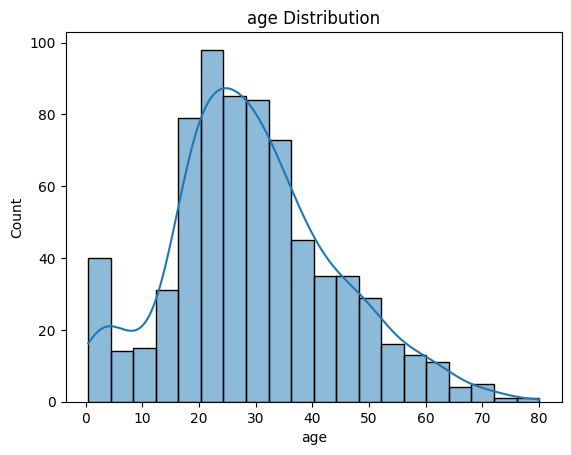

mean:  29.69911764705882 , median:  28.0 , range:  79.58


In [14]:
visualize_numerical_feature('age')

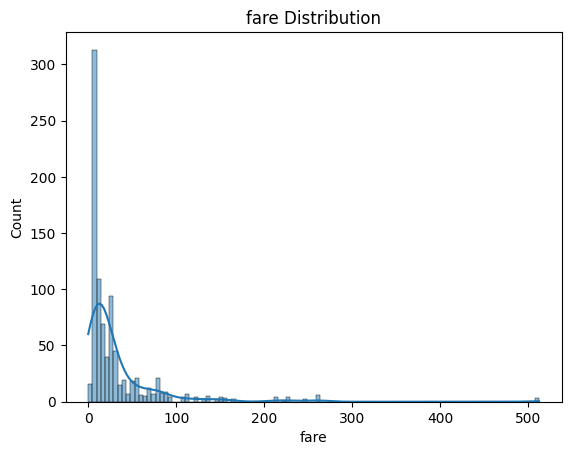

mean:  32.204207968574636 , median:  14.4542 , range:  512.3292


In [15]:
visualize_numerical_feature('fare')

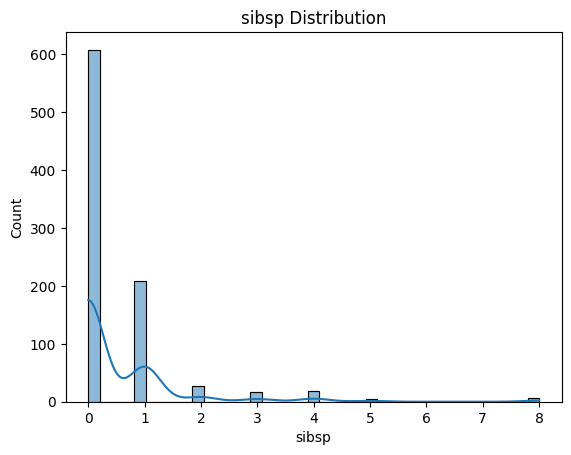

mean:  0.5230078563411896 , median:  0.0 , range:  8


In [16]:
visualize_numerical_feature('sibsp')

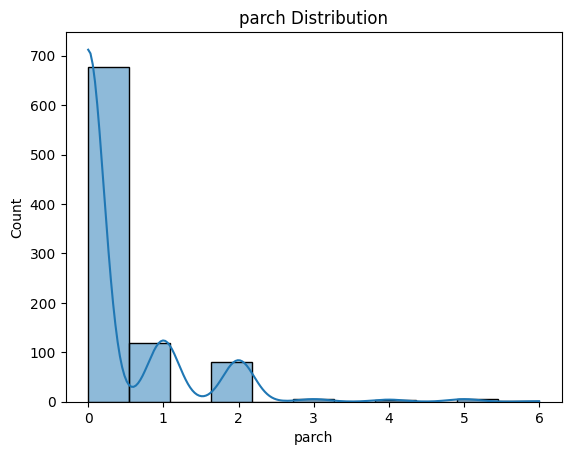

mean:  0.38159371492704824 , median:  0.0 , range:  6


In [17]:
visualize_numerical_feature('parch')

We also note right skewness in the distrubtions of **nsibsp** and **parch** attributes.

### 2. Visualization Attributes - Categorical Attributes

There will be five categorical attributes that we will explore. So instead of repeating the same code again and again, let's define a function that takes in the feature name as input, and displays a frequency count for each value of the feature and create a bar chart.

In [18]:
def visualize_categorical_feature(feature):
    print(titanic[feature].value_counts())

    plt.figure(figsize=(6, 4))
    sns.countplot(data=titanic, x=feature)
    plt.title(f"Frequency of {feature}")
    plt.show()

Let's start with sex.

sex
male      577
female    314
Name: count, dtype: int64


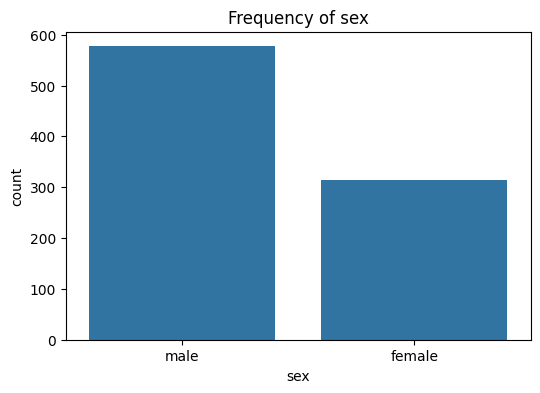

In [19]:
visualize_categorical_feature('sex')

There was many more male passengers compared to female passengers.

pclass
3    491
1    216
2    184
Name: count, dtype: int64


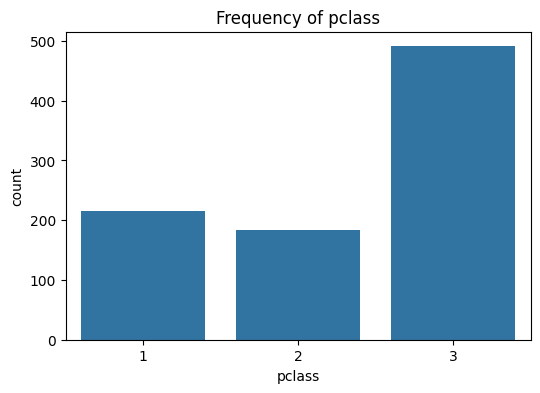

In [20]:
visualize_categorical_feature('pclass')

The majority of the passengers were 3rd class passengers.

embarked
S    644
C    168
Q     77
Name: count, dtype: int64


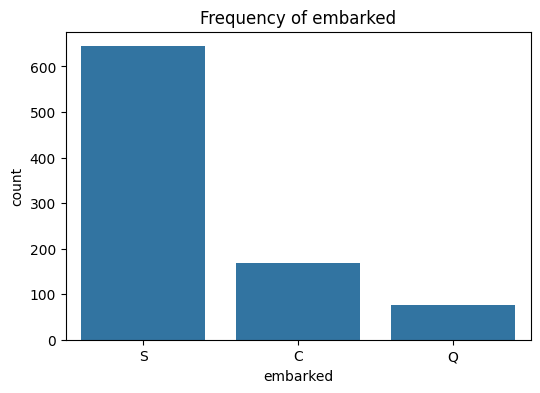

In [21]:
visualize_categorical_feature('embarked')

survived
0    549
1    342
Name: count, dtype: int64


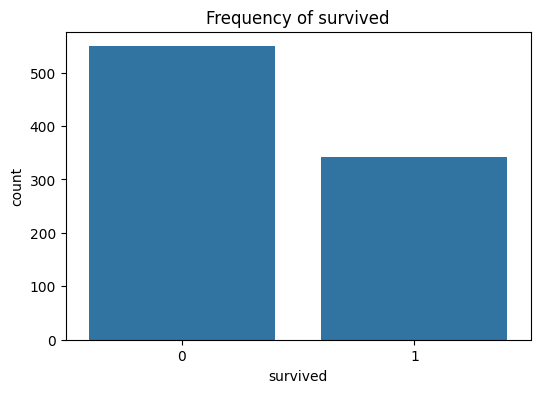

In [22]:
visualize_categorical_feature('survived')

More people died than survived. Almost twice as many people died than survived.

who
man      537
woman    271
child     83
Name: count, dtype: int64


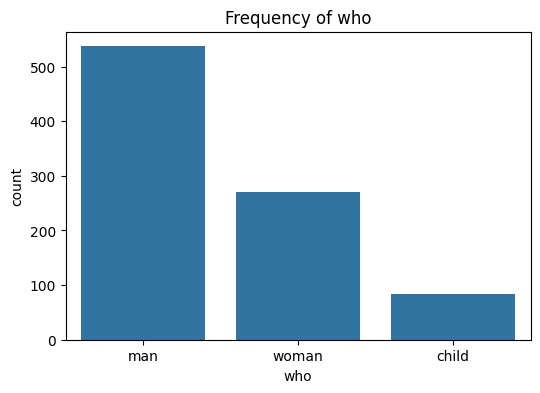

In [23]:
visualize_categorical_feature('who')

## Data Preparation

### 1. Imputing Missing Values

Imputing missing values for 'Age' and 'Embarked'

We will use the median to impute the missing **age** values, and the mode to impute the missing **embarked** and **embark_town** missing values.

In [24]:
imputer_median = SimpleImputer(strategy='median')
titanic['age'] = imputer_median.fit_transform(titanic[['age']])

In [25]:
imputer_mode = SimpleImputer(strategy='most_frequent')
titanic['embarked'] = imputer_mode.fit_transform(titanic[['embarked']]).ravel()
titanic['embark_town'] = imputer_mode.fit_transform(titanic[['embark_town']]).ravel()

### 2. Calculating Correlations Between Attributes

#### Create the pairplot

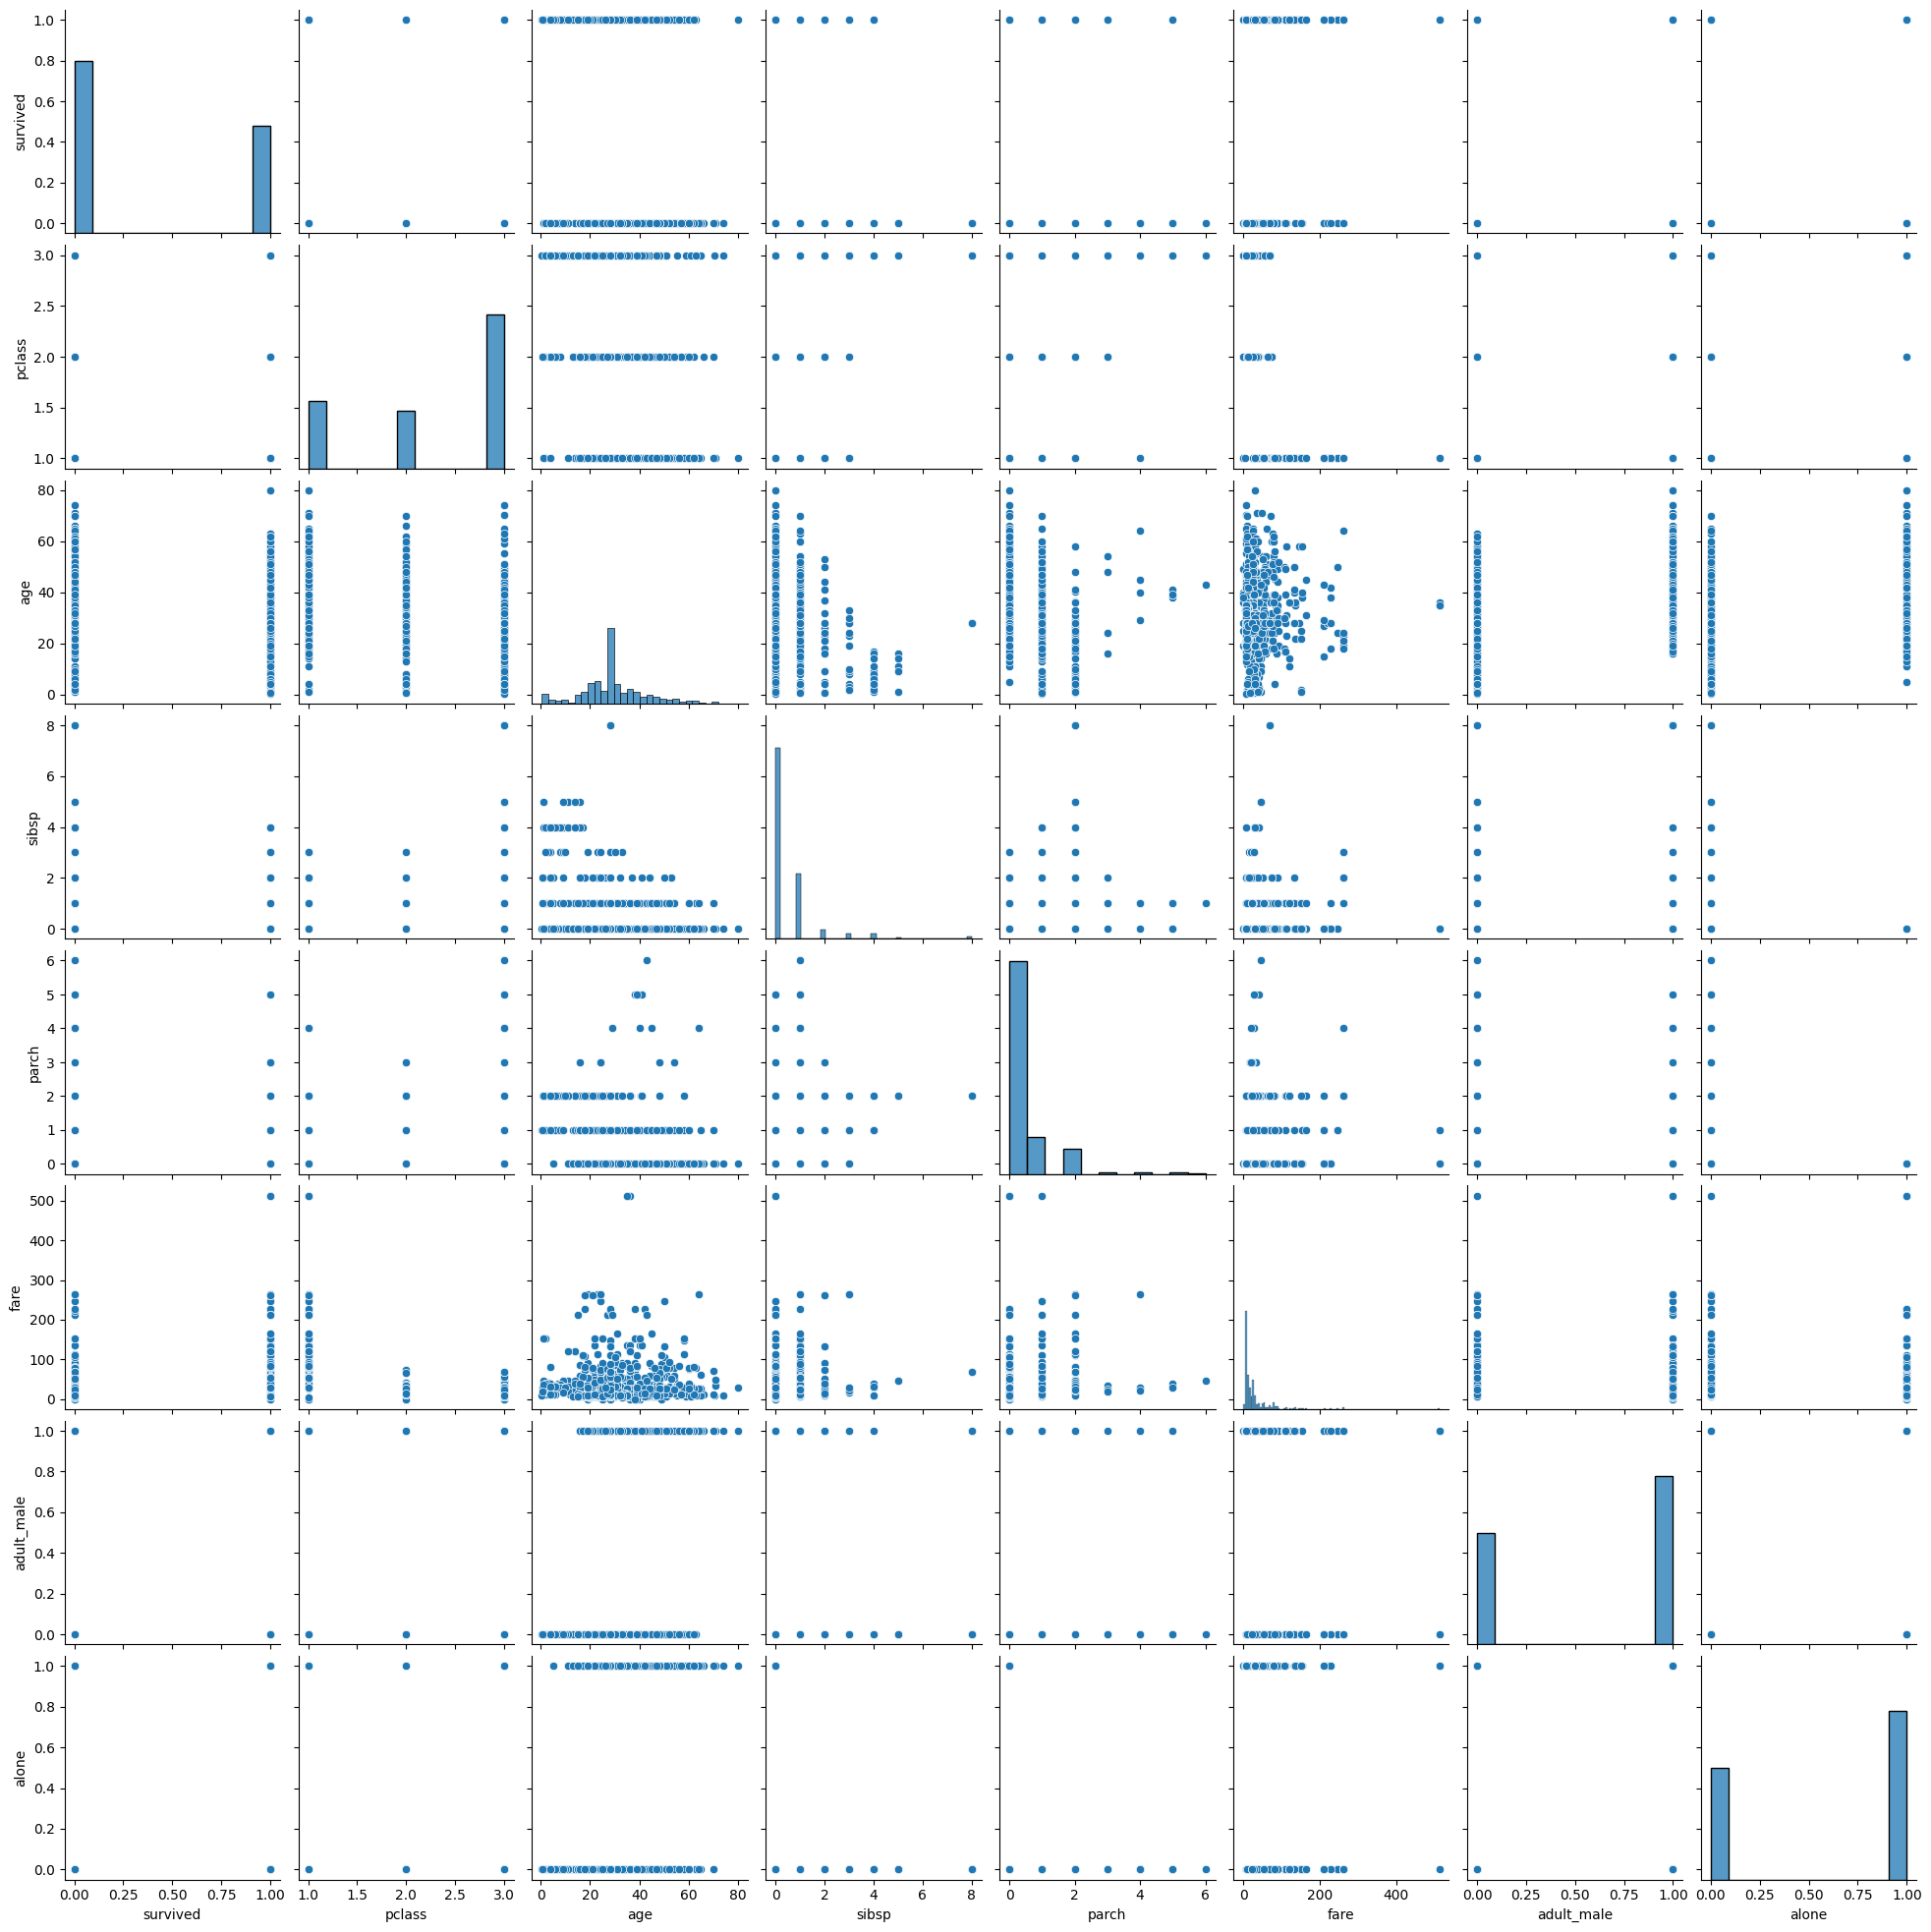

In [26]:
sns.pairplot(titanic)

#### Correlation Between Fare and Age

Pearson correlation between Age and Fare

In [27]:
pearson_corr, pearson_p = pearsonr(titanic['age'], titanic['fare'])
print(
    "Pearson correlation between Age and Fare: {}, p-value: {}".format(pearson_corr, pearson_p)
)

Pearson correlation between Age and Fare: 0.09668842218036486, p-value: 0.0038667538638709293


Spearman's Rank correlation between Age and Fare

In [28]:
spearman_corr, spearman_p = spearmanr(titanic['age'], titanic['fare'])
print(
    "Spearman's rank correlation between Age and Fare: {}, p-value: {}".format(
        spearman_corr, spearman_p
    )
)

Spearman's rank correlation between Age and Fare: 0.12600552124010062, p-value: 0.00016260974540267112


Spearman's Rank correlation between Age and sibsp

In [29]:
spearman_corr, spearman_p = spearmanr(titanic['age'], titanic['sibsp'])
print(
    "Spearman's rank correlation between Age and Number of Siblings / Spouse: {}, p-value: {}".format(
        spearman_corr, spearman_p
    )
)

Spearman's rank correlation between Age and Number of Siblings / Spouse: -0.14531599684215146, p-value: 1.3326571458735127e-05


#### Correlations Between Survived and Attributes

**Point Biserial correlation between survived and fare**

In [30]:
point_biserial_corr, point_biserial_p = pointbiserialr(titanic['survived'], titanic['fare'])
print(
    "Point Biserial correlation between survived and fare: {}, p-value: {}".format(
        point_biserial_corr, point_biserial_p
    )
)

Point Biserial correlation between survived and fare: 0.2573065223849624, p-value: 6.120189341924608e-15


There is a weak positive correlation between the fare and survival. This suggests that as the fare increases, the likelihood of survival tends to increase.

**Point Biserial correlation between survived and age**

In [31]:
point_biserial_corr, point_biserial_p = pointbiserialr(titanic['survived'], titanic['age'])
print(
    "Point Biserial correlation between survived and age: {}, p-value: {}".format(
        point_biserial_corr, point_biserial_p
    )
)

Point Biserial correlation between survived and age: -0.06491041993052585, p-value: 0.05276068847585567


There is a very weak negative correlation between age and survival, meaning that as age increases, the likelihood of survival slightly decreases.

**Point Biserial correlation between survived and sibsp**

In [32]:
point_biserial_corr, point_biserial_p = pointbiserialr(titanic['survived'], titanic['sibsp'])
print(
    "Point Biserial correlation between survived and sibsp: {}, p-value: {}".format(
        point_biserial_corr, point_biserial_p
    )
)

Point Biserial correlation between survived and sibsp: -0.03532249888573552, p-value: 0.29224392869829624


There is a very weak negative correlation between the number of siblings/spouses aboard and survival. This suggests that having more siblings or spouses aboard slightly decreases the likelihood of survival.

**Point Biserial correlation between survived and parch**

In [33]:
point_biserial_corr, point_biserial_p = pointbiserialr(titanic['survived'], titanic['parch'])
print(
    "Point Biserial correlation between survived and parch: {}, p-value: {}".format(
        point_biserial_corr, point_biserial_p
    )
)

Point Biserial correlation between survived and parch: 0.08162940708348344, p-value: 0.014799245374727947


There is a weak positive correlation between the number of parents/children aboard and survival. This suggests that having more parents or children aboard is slightly associated with a higher likelihood of survival.

**Chi2 test between pclass and survived**

In [34]:
contingency_table = pd.crosstab(titanic['pclass'], titanic['survived'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-squared Test Statistic: {}".format(chi2))
print("p-value: {}".format(p))
print("Degrees of Freedom: {}".format(dof))

Chi-squared Test Statistic: 102.88898875696056
p-value: 4.549251711298793e-23
Degrees of Freedom: 2


The Chi-squared test statistic is quite large, which suggests a strong association between the variables pclass and survived.

**Chi2 test between embarked and survived**

In [35]:
contingency_table = pd.crosstab(titanic['embarked'], titanic['survived'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-squared Test Statistic: {}".format(chi2))
print("p-value: {}".format(p))
print("Degrees of Freedom: {}".format(dof))

Chi-squared Test Statistic: 25.964452881874784
p-value: 2.3008626481449577e-06
Degrees of Freedom: 2


The high chi-squared statistic suggests that passengers from different embarkation ports had different survival rates.

**Chi2 test between sex and survived**

In [36]:
contingency_table = pd.crosstab(titanic['sex'], titanic['survived'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-squared Test Statistic: {}".format(chi2))
print("p-value: {}".format(p))
print("Degrees of Freedom: {}".format(dof))

Chi-squared Test Statistic: 260.71702016732104
p-value: 1.1973570627755645e-58
Degrees of Freedom: 1


The high chi-squared statistic suggests that whether a passenger was male or female had a very strong influence on their likelihood of survival.

**chi2 test between who and survived**

In [37]:
contingency_table = pd.crosstab(titanic['who'], titanic['survived'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-squared Test Statistic: {}".format(chi2))
print("p-value: {}".format(p))
print("Degrees of Freedom: {}".format(dof))

Chi-squared Test Statistic: 283.923050324233
p-value: 2.2227620817798914e-62
Degrees of Freedom: 2


There is a highly significant relationship between the who variable (man, woman, child) and survival. This aligns with historical knowledge that women and children were given priority in lifeboats, which greatly increased their chances of survival compared to men.

After imputing the missing values and exploring the correlations between the different attributes, let's confirm that we don't have missing values anymore.

In [38]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [39]:
missing_data = titanic.isnull().sum()

print("Missing Data in the Titanic Dataset:\n", missing_data)

Missing Data in the Titanic Dataset:
 survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           688
embark_town      0
alive            0
alone            0
dtype: int64


### 3. Dropping Attributes

We will drop: <br>
    - **deck**: because of the high number of missing values <br>
    - **class**: because it is a duplicate of pclass <br>
    - **embark_town**: because it is a duplicate of embarked <br>
    - **alive**: because it is a duplicate of suvived <br>
    - **adult_male**: because it is a duplicate of sex <br>

In [40]:
titanic_cleaned = titanic.drop(['deck', 'class', 'embark_town', 'alive', 'adult_male'], axis=1)

In [41]:
titanic_cleaned.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,alone
0,0,3,male,22.0,1,0,7.2500,S,man,False
1,1,1,female,38.0,1,0,71.2833,C,woman,False
2,1,3,female,26.0,0,0,7.9250,S,woman,True
3,1,1,female,35.0,1,0,53.1000,S,woman,False
4,0,3,male,35.0,0,0,8.0500,S,man,True


### 3. Handling Skewness in Numerical Features

Apply log(1 + x) transformation to skewed numerical features: fare, sibsp, parch

In [42]:
titanic_cleaned['fare_log'] = np.log1p(titanic_cleaned['fare'])
titanic_cleaned['sibsp_log'] = np.log1p(titanic_cleaned['sibsp'])
titanic_cleaned['parch_log'] = np.log1p(titanic_cleaned['parch'])

In [43]:
titanic_cleaned.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,alone,fare_log,sibsp_log,parch_log
0,0,3,male,22.0,1,0,7.2500,S,man,False,2.110213,0.693147,0.0
1,1,1,female,38.0,1,0,71.2833,C,woman,False,4.280593,0.693147,0.0
2,1,3,female,26.0,0,0,7.9250,S,woman,True,2.188856,0.000000,0.0
3,1,1,female,35.0,1,0,53.1000,S,woman,False,3.990834,0.693147,0.0
4,0,3,male,35.0,0,0,8.0500,S,man,True,2.202765,0.000000,0.0


### 4. Scaling Numerical Features

In [44]:
numerical_features = ['age', 'fare_log', 'sibsp_log', 'parch_log']

In [45]:
scaler = StandardScaler()
titanic_cleaned[numerical_features] = scaler.fit_transform(titanic_cleaned[numerical_features])

In [46]:
titanic_cleaned.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,alone,fare_log,sibsp_log,parch_log
0,0,3,male,-0.565736,1,0,7.2500,S,man,False,-0.879741,0.889164,-0.52906
1,1,1,female,0.663861,1,0,71.2833,C,woman,False,1.361220,0.889164,-0.52906
2,1,3,female,-0.258337,0,0,7.9250,S,woman,True,-0.798540,-0.609279,-0.52906
3,1,1,female,0.433312,1,0,53.1000,S,woman,False,1.062038,0.889164,-0.52906
4,0,3,male,0.433312,0,0,8.0500,S,man,True,-0.784179,-0.609279,-0.52906


### 5. Encoding Categorical Features

In [47]:
nominal_vars = ['sex', 'who', 'embarked', 'alone']  # nominal variables to be one-hot encoded
ordinal_vars = ['pclass']  # ordinal variable to be ordinal encoded

One-hot encoding nominal variables

In [48]:
onehot_encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_nominal = onehot_encoder.fit_transform(titanic_cleaned[nominal_vars])
encoded_nominal_df = pd.DataFrame(encoded_nominal, columns=onehot_encoder.get_feature_names_out(nominal_vars))

In [49]:
encoded_nominal_df

,sex_male,who_man,who_woman,embarked_Q,embarked_S,alone_True
0,1.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,1.0,1.0
3,0.0,0.0,1.0,0.0,1.0,0.0
4,1.0,1.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...
886,1.0,1.0,0.0,0.0,1.0,1.0
887,0.0,0.0,1.0,0.0,1.0,1.0
888,0.0,0.0,1.0,0.0,1.0,0.0
889,1.0,1.0,0.0,0.0,0.0,1.0


Ordinal encoding ordinal variables

In [50]:
ordinal_encoder = OrdinalEncoder()
encoded_ordinal = ordinal_encoder.fit_transform(titanic_cleaned[ordinal_vars])
encoded_ordinal_df = pd.DataFrame(encoded_ordinal, columns=ordinal_vars)
encoded_ordinal_df

,pclass
0,2.0
1,0.0
2,2.0
3,0.0
4,2.0
...,...
886,1.0
887,0.0
888,2.0
889,0.0


Drop the original categorical columns

In [51]:
titanic_cleaned = titanic_cleaned.drop(nominal_vars + ordinal_vars + ['fare', 'sibsp', 'parch'], axis=1)

In [52]:
titanic_cleaned.head()

,survived,age,fare_log,sibsp_log,parch_log
0,0,-0.565736,-0.879741,0.889164,-0.52906
1,1,0.663861,1.361220,0.889164,-0.52906
2,1,-0.258337,-0.798540,-0.609279,-0.52906
3,1,0.433312,1.062038,0.889164,-0.52906
4,0,0.433312,-0.784179,-0.609279,-0.52906


## Prepared Data

Combine the encoded nominal, ordinal, and scaled numerical features into one dataframe

In [53]:
titanic_final = pd.concat(
    [titanic_cleaned, encoded_nominal_df, encoded_ordinal_df], axis=1
)

In [54]:
print(titanic_final.head())

   survived       age  fare_log  sibsp_log  parch_log  sex_male  who_man  \
0         0 -0.565736 -0.879741   0.889164   -0.52906       1.0      1.0   
1         1  0.663861  1.361220   0.889164   -0.52906       0.0      0.0   
2         1 -0.258337 -0.798540  -0.609279   -0.52906       0.0      0.0   
3         1  0.433312  1.062038   0.889164   -0.52906       0.0      0.0   
4         0  0.433312 -0.784179  -0.609279   -0.52906       1.0      1.0   

   who_woman  embarked_Q  embarked_S  alone_True  pclass  
0        0.0         0.0         1.0         0.0     2.0  
1        1.0         0.0         0.0         0.0     0.0  
2        1.0         0.0         1.0         1.0     2.0  
3        1.0         0.0         1.0         0.0     0.0  
4        0.0         0.0         1.0         1.0     2.0  
